In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rakeshrau/social-network-ads")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 3.27k/3.27k [00:00<00:00, 3.33MB/s]

Extracting files...
Path to dataset files: C:\Users\itsam\.cache\kagglehub\datasets\rakeshrau\social-network-ads\versions\1


In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df =  df[['Age', 'EstimatedSalary', 'Purchased']]

In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [14]:
X = scaler.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X_train , X_test , y_train , y_test = train_test_split(X,y,
                                                      test_size=0.2,
                                                      random_state=2)

In [18]:
X_train.shape

(320, 2)

In [19]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense

In [53]:
model = Sequential()

In [54]:
model.add(Dense(10 , activation='relu' , input_dim=2))
model.add(Dense(10 , activation='relu'))
model.add(Dense(1 , activation='sigmoid'))

C:\Users\itsam\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [56]:
import time

In [57]:
model.compile(loss='binary_crossentropy' , metrics=['accuracy'])
start = time.time()
history = model.fit(X_train , y_train , epochs=10, batch_size=320 , validation_split=0.2)
print(time.time()-start)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step - accuracy: 0.3242 - loss: 0.7950 - val_accuracy: 0.2656 - val_loss: 0.7797
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.3555 - loss: 0.7838 - val_accuracy: 0.2969 - val_loss: 0.7723
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.3633 - loss: 0.7759 - val_accuracy: 0.3125 - val_loss: 0.7663
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.3672 - loss: 0.7696 - val_accuracy: 0.3125 - val_loss: 0.7610
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.3984 - loss: 0.7640 - val_accuracy: 0.3281 - val_loss: 0.7562
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4023 - loss: 0.7590 - val_accuracy: 0.3281 - val_loss: 0.7518
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.4062 - loss: 0.7544 - val_accuracy: 0.3281 - val_loss: 0.7478
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4180 - loss: 0.7501 - val_accuracy: 0.3438 - val_loss: 0.7440

### Stochastic Gradient Descent

In [58]:
model1 = Sequential()

In [59]:
model1.add(Dense(10 , activation='relu' , input_dim=2))
model1.add(Dense(10 , activation='relu'))
model1.add(Dense(1 , activation='sigmoid'))

C:\Users\itsam\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [61]:
model1.compile(loss='binary_crossentropy' , metrics=['accuracy'])
start = time.time()
history1 = model1.fit(X_train , y_train , epochs=10, batch_size=1,validation_split=0.2)
print(time.time()-start)

Epoch 1/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6367 - loss: 0.6643 - val_accuracy: 0.7188 - val_loss: 0.4911
Epoch 2/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6175 - loss: 0.5007 - val_accuracy: 0.7500 - val_loss: 0.3815
Epoch 3/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7820 - loss: 0.3999 - val_accuracy: 0.8750 - val_loss: 0.3281
Epoch 4/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8830 - loss: 0.3519 - val_accuracy: 0.8750 - val_loss: 0.2874
Epoch 5/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8266 - loss: 0.3616 - val_accuracy: 0.8906 - val_loss: 0.2573
Epoch 6/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8700 - loss: 0.3029 - val_accuracy: 0.8906 - val_loss: 0.2408
Epoch 7/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8798 - loss: 0.2950 - val_accuracy: 0.8750 - val_loss: 0.2369
Epoch 8/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8875 - loss: 0.2873 - val_accuracy: 0.

In [62]:
import matplotlib.pyplot as plt

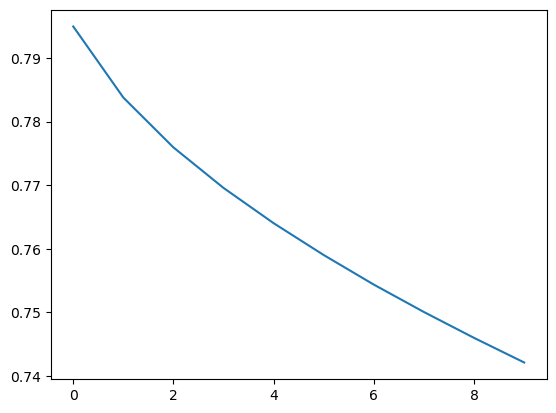

In [63]:
plt.plot(history.history['loss'])

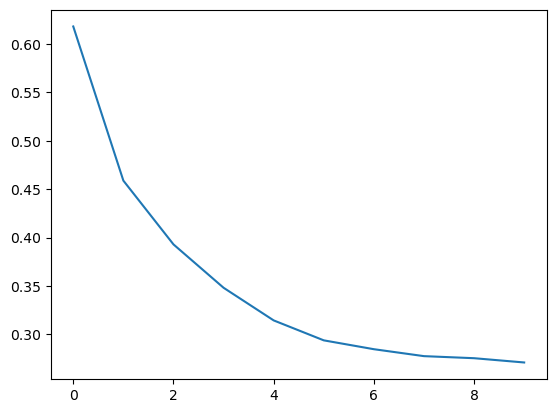

In [64]:
plt.plot(history1.history['loss'])